## Displaying Csound Tables

### 1. With iCsound's plotTable() function

The most simple and fastest way to plot any table content in a jupyter notebook inline is with iCsound. The only thing to load are the csoundmagics:

In [1]:
%load_ext csoundmagics

Start an instance of iCsound. This automatically starts the Csound engine:

In [2]:
cs = ICsound()

Csound engine started at slot#: 1.


Send the Csound code to the engine at slot 1:

In [3]:
%%csound 1
giSine ftgen 1, 0, 32, 10, 1
giRndTab ftgen 0, 0, 32, 21, 6, 1

A table can be plotted by its number or by its variable name:

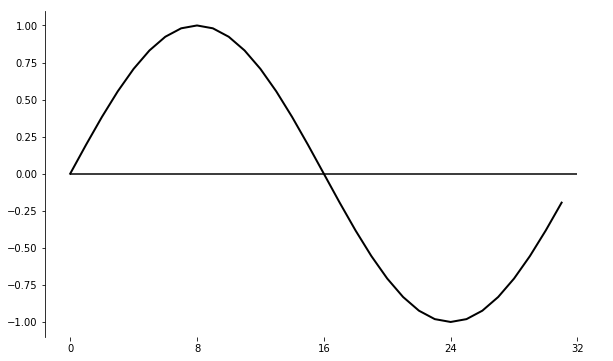

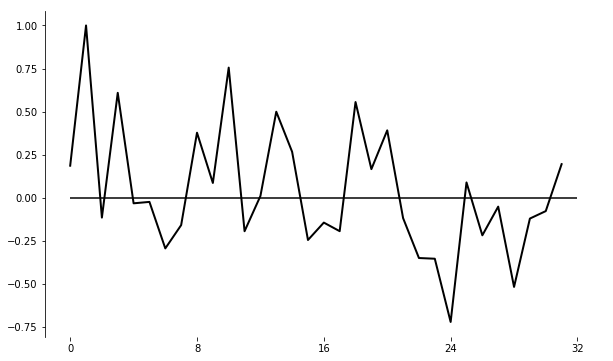

In [4]:
cs.plotTable(1)
cs.plotTable('giRndTab')

Both tables can also be plotted in one figure:

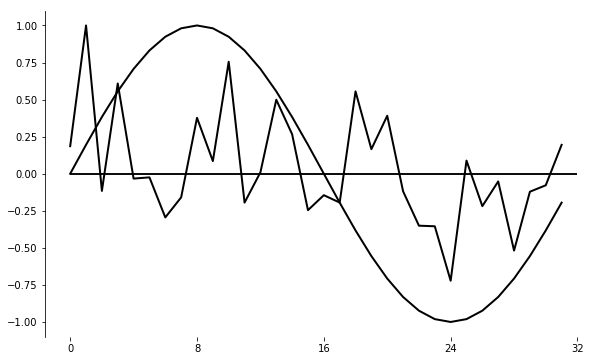

In [5]:
cs.plotTable(1)
cs.plotTable('giRndTab', reuse=True)

You can also read tables from a .csd file:

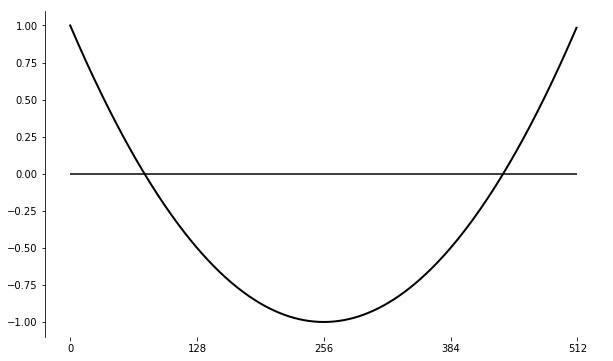

In [6]:
cs.compileCsd('tables.csd')
cs.plotTable('giCheby')

Release the Csound instance at the end:

In [7]:
cs.stopEngine()

### 2. With iCsound and own plotting options

If you need more options for own plots, or want to show the plot in an own panel, it is most simple to use iCsound for creating the Csound instance, and then the matplotlib for plotting.

In [8]:
#load_ext csoundmagics
#cs = ICsound()
cs.startEngine()

Csound engine started at slot#: 1.


In [9]:
%%csound 1
giSine ftgen 1, 0, 32, 10, 1
giRndTab ftgen 0, 0, 32, 21, 6, 1

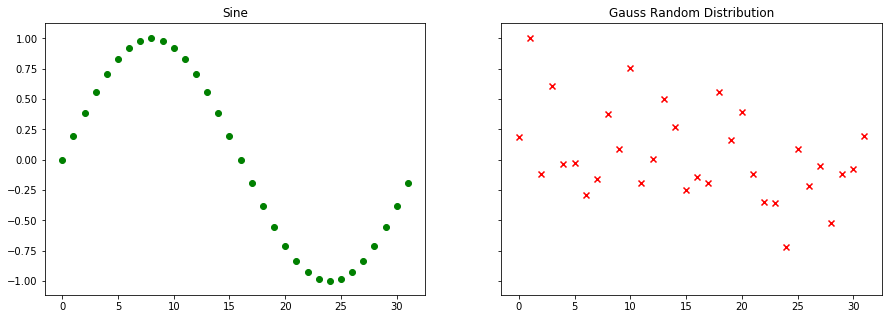

In [10]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5),sharey='all')
x = range(cs.tableLength(1))

y1 = cs.table(1)
ax1.scatter(x,y1,color='g')
ax1.set(title='Sine')

y2_tabnum = int(cs.evalCode('return giRndTab'))
y2 = cs.table(y2_tabnum)
ax2.scatter(x,y2,marker='x',c='r')
ax2.set(title='Gauss Random Distribution')
plt.show()

Or in an external panel with both plots in one figure:

In [11]:
%matplotlib qt5
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,5))
x = range(cs.tableLength(1))

y1 = cs.table(1)
ax.scatter(x,y1,color='g',label='Sine')

y2_tabnum = int(cs.evalCode('return giRndTab'))
y2 = cs.table(y2_tabnum)
ax.scatter(x,y2,marker='x',c='r',label='Gauss Random Distribution')

fig.legend()
plt.show()

Stop and delete the engine:

In [12]:
%csound -1
del cs

Erasing slot#: 1


### 3. Plotting without iCsound

If you don't want to use iCsound and the csoundmagics, you can reproduce the last example with this code:

In [13]:
%matplotlib qt5
import matplotlib.pyplot as plt
import ctcsound as csound

orc = '''
giSine ftgen 1, 0, 32, 10, 1
giRndTab ftgen 0, 0, 32, 21, 6, 1
'''
cs = csound.Csound()
cs.setOption('-odac')
cs.compileOrc(orc)
cs.start()

pt = csound.CsoundPerformanceThread(cs.csound())
pt.play()

fig,ax = plt.subplots(figsize=(8,5))
x = range(cs.tableLength(1))

y1 = cs.table(1)
ax.scatter(x,y1,color='g',label='Sine')

y2_tabnum = int(cs.evalCode('return giRndTab'))
y2 = cs.table(y2_tabnum)
ax.scatter(x,y2,marker='x',c='r',label='Gauss Random Distribution')

fig.legend()
plt.show()

In [14]:
#stop and cleanup
pt.stop()
pt.join()
cs.reset()

Author: Joachim Heintz, September 2019